<a href="https://colab.research.google.com/github/e-evarela/DataJour/blob/main/NAFTEMPORIKI_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [2]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [3]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [4]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [5]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [6]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [7]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 26.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy

In [9]:
nlp = spacy.load('el_core_news_sm')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_Naftemporikh_Airbnb.csv")
# airbnb_df = pd.read_csv(data_csv_url)

In [12]:
airbnb_df

article_url  \
0    https://www.naftemporiki.gr/techscience/196416...   
1    https://www.naftemporiki.gr/paraskiniaka/19639...   
2    https://www.naftemporiki.gr/finance/world/1963...   
3    https://www.naftemporiki.gr/kosmos/1958205/ent...   
4    https://www.naftemporiki.gr/finance/world/1958...   
..                                                 ...   
145  https://www.naftemporiki.gr/society/502876/gal...   
146  https://www.naftemporiki.gr/opinion/444155/air...   
147  https://www.naftemporiki.gr/finance/426045/vre...   
148  https://www.naftemporiki.gr/finance/404144/aad...   
149  https://www.naftemporiki.gr/techscience/266277...   

                                                 title        date      time  \
0    Η Airbus αλλάζει τη διάταξη των αεροπορικών θέ...  2025-06-03  13:23:58   
1    Το νέο μεγάλο deal της Εθνικής, το airball της...  2025-06-03  07:27:48   
2    Το σύνδρομο της Airbus: Η Ευρώπη κυνηγά υψηλές...  2025-06-01  20:48:19   
3    Έντονη αντίδραση της Airbnb στην απόφαση της ι...  2025-05-19  18:23:19   
4    Ισπανία: «Μπλόκο» της κυβέρνησης σε περισσότερ...  2025-05-19  14:30:58   
..                                                 ...         ...       ...   
145  Γαλλία: Το εφετείο αποφάσισε την παραπομπή σε ...  2021-05-12  12:04:08   
146    Airbus A380: Η καθήλωση του Γίγαντα των αιθέρων  2021-05-06  16:35:00   
147  Βρετανίδα υπ. Εμπορίου: Τον Ιούλιο η επίλυση τ...  2021-04-30  17:35:00   
148     ΑΑΔΕ: Συμφωνία με Airbnb, Booking.com και VRBO  2021-04-27  12:14:00   
149  PERIOD: Εργοστάσιο δορυφόρων σε τροχιά από την...  2021-03-31  15:16:00   

                                          section author  \
0                           Τεχνολογία & Επιστήμη    NaN   
1                                             NaN    NaN   
2       Οικονομία & Αγορές                \Διεθνή    NaN   
3                                          Κόσμος    NaN   
4       Οικονομία & Αγορές                \Διεθνή    NaN   
..                                            ...    ...   
145                                      Κοινωνία    NaN   
146                                       Απόψεις    NaN   
147                            Οικονομία & Αγορές    NaN   
148  Οικονομία & Αγορές                \Οικονομία    NaN   
149                         Τεχνολογία & Επιστήμη    NaN   

                                               excerpt  \
0    Οι αεροπορικές εταιρείες μελετούν πολλών ειδών...   
1                      «Κυκλώνει» ασφαλιστική η Εθνική   
2    Όταν όλα αποτυγχάνουν, η Ευρώπη έχει πάντα μια...   
3    Η ισπανική κυβέρνηση ζήτησε από την Airbnb να ...   
4    Η Ισπανία διέταξε την Airbnb να αποσύρει περισ...   
..                                                 ...   
145                                                NaN   
146                                                NaN   
147                                                NaN   
148                                                NaN   
149                                                NaN   

                                             text_body  \
0    Η Airbus συνεργάζεται με την ισπανική νεοφυή ε...   
1    Ακραίες ύβρεις, χυδαιότητες, εκατέρωθεν καταγγ...   
2    Δεν έχει σημασία αν πρόκειται για δίκτυα cloud...   
3    «Η Airbnb πρέπει να αφαιρέσει συνολικά 65.935 ...   
4    Οι περισσότερες από τις καταχωρίσεις της Airbn...   
..                                                 ...   
145  Γαλλικό δικαστήριο αποφάνθηκε πως η Air France...   
146  Η πανδημία του κορωνοϊού που ξέσπασε στις αρχέ...   
147  Η Βρετανίδα υπουργός Εμπορίου Λιζ Τρας αναμένε...   
148  Πρωτόκολλο συνεργασίας με τις Airbnb, Booking....   
149  H Ευρωπαϊκή Επιτροπή επέλεξε την Airbus για τη...   

                                         feat_img_link  \
0    https://www.naftemporiki.gr/wp-content/themes/...   
1    https://www.naftemporiki.gr/wp-content/themes/...   
2    https://www.naftemporiki.gr/wp-content/themes/...   
3    https://www.naftemporiki.gr/wp-co

In [13]:
airbnb_df = airbnb_df.dropna(subset="date").reset_index(drop=True)
airbnb_df = airbnb_df.dropna(subset="text_body").reset_index(drop=True)
airbnb_df.shape

(150, 10)

In [14]:
airbnb_df.tail(40)

article_url  \
110  https://www.naftemporiki.gr/finance/1298302/ai...   
111  https://www.naftemporiki.gr/finance/1288632/ai...   
112  https://www.naftemporiki.gr/finance/1287521/ai...   
113  https://www.naftemporiki.gr/finance/1287232/gi...   
114  https://www.naftemporiki.gr/finance/18357/airb...   
115  https://www.naftemporiki.gr/finance/1283943/ai...   
116  https://www.naftemporiki.gr/finance/1263943/ga...   
117  https://www.naftemporiki.gr/finance/1263939/a3...   
118  https://www.naftemporiki.gr/clickatlife/126093...   
119  https://www.naftemporiki.gr/clickatlife/125612...   
120  https://www.naftemporiki.gr/business/1242394/i...   
121  https://www.naftemporiki.gr/finance/1242163/ja...   
122  https://www.naftemporiki.gr/techscience/124180...   
123  https://www.naftemporiki.gr/finance/1240676/ai...   
124  https://www.naftemporiki.gr/finance/1224971/i-...   
125  https://www.naftemporiki.gr/opinion/1202637/i-...   
126  https://www.naftemporiki.gr/techscience/117665...   
127  https://www.naftemporiki.gr/business/1161203/i...   
128  https://www.naftemporiki.gr/finance/1070443/oi...   
129  https://www.naftemporiki.gr/techscience/100287...   
130  https://www.naftemporiki.gr/finance/998331/i-a...   
131  https://www.naftemporiki.gr/finance/964795/air...   
132  https://www.naftemporiki.gr/finance/879988/sti...   
133  https://www.naftemporiki.gr/finance/865547/kin...   
134  https://www.naftemporiki.gr/business/862744/sk...   
135  https://www.naftemporiki.gr/finance/834934/mni...   
136  https://www.naftemporiki.gr/techscience/797351...   
137  https://www.naftemporiki.gr/opinion/761919/air...   
138  https://www.naftemporiki.gr/business/740518/ch...   
139  https://www.naftemporiki.gr/clickatlife/742005...   
140  https://www.naftemporiki.gr/kosmos/738498/airb...   
141  https://www.naftemporiki.gr/finance/686068/oi-...   
142  https://www.naftemporiki.gr/finance/641625/air...   
143  https://www.naftemporiki.gr/finance/607790/air...   
144  https://www.naftemporiki.gr/finance/515473/o-e...   
145  https://www.naftemporiki.gr/society/502876/gal...   
146  https://www.naftemporiki.gr/opinion/444155/air...   
147  https://www.naftemporiki.gr/finance/426045/vre...   
148  https://www.naftemporiki.gr/finance/404144/aad...   
149  https://www.naftemporiki.gr/techscience/266277...   

                                                 title        date      time  \
110  Airbnb: Πώς ο πληθωρισμός θα δημιουργήσει περι...  2022-02-16  08:04:00   
111           Airbnb: Πώς επωφελείται από την πανδημία  2022-01-22  12:59:00   
112          Airbus και Boeing απειλούνται εξ ανατολών  2022-01-19  21:06:00   
113           Γίνεται ψηφιακός νομάς ο CEO της Airbnb;  2022-01-19  12:17:00   
114  Airbus: Αύξηση παραδόσεων και παραγγελιών, αλλ...  2022-01-10  20:05:00   
115  Airbus: Αύξηση παραδόσεων και παραγγελιών, αλλ...  2022-01-10  20:05:00   
116  Γαλλία: Εκατό A320neo θα αγοράσει από την Airb...  2021-12-16  23:11:00   
117  A380: «Τέλος εποχής» για την ιπτάμενη «φάλαινα...  2021-12-16  21:35:00   
118  Ανακαλύπτουμε πανέμορφα Airbnb σε χριστουγεννι...  2021-12-10  08:51:00   
119  Το σπίτι του «Home Alone» είναι διαθέσιμο στο ...  2021-12-02  16:09:00   
120  Η Airbus εισέρχεται δυναμικά στον τομέα των αε...  2021-11-16  16:12:00   
121  Jazeera Airways: Κοντά σε μία παραγγελία 30 αε...  2021-11-16  09:19:00   
122  O «Ζέφυρος» της Airbus παρείχε ευρυζωνικό Inte...  2021-11-16  08:00:00   
123     Airbus: Το πρώτο μεγάλο deal μετά την πανδημία  2021-11-15  07:12:34   
124  Η Airbnb αναμένεται να εδραιώσει τη θέση της κ...  2021-11-02  15:06:17   
125            Η επαναφορά του κολοσσιαίου Airbus A380  2021-10-21  22:10:00   
126  Η Airbus υπόσχεται Internet σε κάθε γωνιά της Γης  2021-10-12  15:30:00   
127  Η Air France παρουσιάζει το πρώτο της Airbus A...  2021-10-06  13:52:33   
128  Οι «επεκτατικές» τάσεις της Wizz Air τονώνουν ...  2021-09-11  09:54:00   
129  ΑΚΥΡΟ – (Η Airbnb θα στεγάσει 20.000 Αφγανούς ...  2021-08-

In [15]:
len(airbnb_df)

150

In [16]:
airbnb_df = airbnb_df.iloc[:-34]

In [17]:
airbnb_df.tail(10)

article_url  \
106  https://www.naftemporiki.gr/finance/1305070/ai...   
107  https://www.naftemporiki.gr/business/1303269/a...   
108  https://www.naftemporiki.gr/clickatlife/130317...   
109  https://www.naftemporiki.gr/finance/1298976/ai...   
110  https://www.naftemporiki.gr/finance/1298302/ai...   
111  https://www.naftemporiki.gr/finance/1288632/ai...   
112  https://www.naftemporiki.gr/finance/1287521/ai...   
113  https://www.naftemporiki.gr/finance/1287232/gi...   
114  https://www.naftemporiki.gr/finance/18357/airb...   
115  https://www.naftemporiki.gr/finance/1283943/ai...   

                                                 title        date      time  \
106       Airbnb: «Check out» από Ρωσία και Λευκορωσία  2022-03-04  08:04:00   
107  Airbnb: Προσφέρει προσωρινή στέγη σε 100.000 Ο...  2022-02-28  13:49:50   
108  Διαμονή σε 5 Airbnb με την καλύτερη θέα στον κ...  2022-02-28  11:16:00   
109     Airbus: Προσδοκίες για υψηλότερα κέρδη το 2022  2022-02-17  13:39:37   
110  Airbnb: Πώς ο πληθωρισμός θα δημιουργήσει περι...  2022-02-16  08:04:00   
111           Airbnb: Πώς επωφελείται από την πανδημία  2022-01-22  12:59:00   
112          Airbus και Boeing απειλούνται εξ ανατολών  2022-01-19  21:06:00   
113           Γίνεται ψηφιακός νομάς ο CEO της Airbnb;  2022-01-19  12:17:00   
114  Airbus: Αύξηση παραδόσεων και παραγγελιών, αλλ...  2022-01-10  20:05:00   
115  Airbus: Αύξηση παραδόσεων και παραγγελιών, αλλ...  2022-01-10  20:05:00   

                                          section author  \
106                            Οικονομία & Αγορές    NaN   
107                                  Επιχειρήσεις    NaN   
108                                   Clickatlife    NaN   
109                            Οικονομία & Αγορές    NaN   
110                            Οικονομία & Αγορές    NaN   
111                            Οικονομία & Αγορές    NaN   
112  Οικονομία & Αγορές                \Οικονομία    NaN   
113                            Οικονομία & Αγορές    NaN   
114                            Οικονομία & Αγορές    NaN   
115                            Οικονομία & Αγορές    NaN   

                                              excerpt  \
106                                               NaN   
107                                               NaN   
108                                               NaN   
109                                               NaN   
110          Τα τριμηνιαία αποτελέσματα της εταιρείας   
111                                               NaN   
112  Το MC-21 αποτελείται κατά40% από συνθετικά υλικά   
113                                               NaN   
114                                               NaN   
115                                               NaN   

                                             text_body  \
106  Η αμερικανική πλατφόρμα ενοικίασης καταλυμάτων...   
107  Η ηλεκτρονική πλατφόρμα βραχυπρόθεσμων μισθώσε...   
108  Το «παράθυρο με θέα» παίρνει άλλη διάσταση στα...   
109  Η Airbus ανακοίνωσε ότι αναμένει υψηλότερα κέρ...   
110  Ο πληθωρισμός που καλπάζει παγκοσμίως μπορεί ν...   
111  Το μετά την πανδημία μέλλον φέρνει ένα ευέλικτ...   
112  Το ρωσικό MC-21 και το κινεζικό C919 φιλοδοξού...   
113  Ο Διευθύνων Σύμβουλος της Airbnb, Μπράιαν Τσέσ...   
114  Η Airbus παρέδωσε 611 αεροσκάφη και εξασφάλισε...   
115  Η Airbus παρέδωσε 611 αεροσκάφη και εξασφάλισε...   

                                         feat_img_link feat_img_cation  
106  https://www.naftemporiki.gr/wp-content/themes/...             NaN  
107  https://www.naftemporiki.gr/wp-content/themes/...             NaN  
108  https://www.naftemporiki.gr/wp-content/themes/...             NaN  
109  https://www.naftemporiki.gr/wp-content/themes/...             NaN  
110  https://www.naftemporiki.gr/wp-content/themes/...             NaN  
111  https://www.naftemporiki.gr/wp-content/themes/...             NaN  
112  https://www.naftemporiki.gr/wp-content/themes/...             NaN  
113  https:

In [18]:
len(airbnb_df)

116

In [19]:
mask = (
    airbnb_df['text_body'].str.contains(r'airbnb|Airbnb|AIRBNB', na=False) | #είχε φέρει και άρθρα που έλεγαν για Airbus
    airbnb_df['title'].str.contains(r'airbnb|Airbnb|AIRBNB', na=False)
)

filtered_df = airbnb_df[mask]

In [20]:
airbnb_df = filtered_df.reset_index(drop=True)

In [21]:
airbnb_df

article_url  \
0   https://www.naftemporiki.gr/kosmos/1958205/ent...   
1   https://www.naftemporiki.gr/finance/world/1958...   
2   https://www.naftemporiki.gr/english/1950055/th...   
3   https://www.naftemporiki.gr/finance/economy/19...   
4   https://www.naftemporiki.gr/finance/economy/19...   
..                                                ...   
74  https://www.naftemporiki.gr/business/1303269/a...   
75  https://www.naftemporiki.gr/clickatlife/130317...   
76  https://www.naftemporiki.gr/finance/1298302/ai...   
77  https://www.naftemporiki.gr/finance/1288632/ai...   
78  https://www.naftemporiki.gr/finance/1287232/gi...   

                                                title        date      time  \
0   Έντονη αντίδραση της Airbnb στην απόφαση της ι...  2025-05-19  18:23:19   
1   Ισπανία: «Μπλόκο» της κυβέρνησης σε περισσότερ...  2025-05-19  14:30:58   
2   Theodoridis on “N” TV: Airbnb can contribute t...  2025-04-29  10:09:32   
3   Κ. Θεοδωρίδης στο Naftemporiki TV: Tα Airbnb μ...  2025-04-28  20:06:08   
4   ΣτΕ: Παράνομο το τέλος επιτηδεύματος στα Airbn...  2025-04-22  17:10:42   
..                                                ...         ...       ...   
74  Airbnb: Προσφέρει προσωρινή στέγη σε 100.000 Ο...  2022-02-28  13:49:50   
75  Διαμονή σε 5 Airbnb με την καλύτερη θέα στον κ...  2022-02-28  11:16:00   
76  Airbnb: Πώς ο πληθωρισμός θα δημιουργήσει περι...  2022-02-16  08:04:00   
77           Airbnb: Πώς επωφελείται από την πανδημία  2022-01-22  12:59:00   
78           Γίνεται ψηφιακός νομάς ο CEO της Airbnb;  2022-01-19  12:17:00   

                                         section author  \
0                                         Κόσμος    NaN   
1      Οικονομία & Αγορές                \Διεθνή    NaN   
2                                        English    NaN   
3   Οικονομία & Αγορές                \Οικονομία    NaN   
4   Οικονομία & Αγορές                \Οικονομία    NaN   
..                                           ...    ...   
74                                  Επιχειρήσεις    NaN   
75                                   Clickatlife    NaN   
76                            Οικονομία & Αγορές    NaN   
77                            Οικονομία & Αγορές    NaN   
78                            Οικονομία & Αγορές    NaN   

                                              excerpt  \
0   Η ισπανική κυβέρνηση ζήτησε από την Airbnb να ...   
1   Η Ισπανία διέταξε την Airbnb να αποσύρει περισ...   
2   “The measure for the return of a rent that the...   
3   «Το μέτρο για την επιστροφή ενός ενοικίου που ...   
4   Παράνομη και ανυπόστατη έκρινε το Β΄ Τμήμα του...   
..                                                ...   
74                                                NaN   
75                                                NaN   
76           Τα τριμηνιαία αποτελέσματα της εταιρείας   
77                                                NaN   
78                                                NaN   

                                            text_body  \
0   «Η Airbnb πρέπει να αφαιρέσει συνολικά 65.935 ...   
1   Οι περισσότερες από τις καταχωρίσεις της Airbn...   
2   “It is a measure that will bring revenue to th...   
3   «Είναι ένα μέτρο που θα φέρει έσοδα στα ταμεία...   
4   Ωστόσο, λόγω της σπουδαιότητάς του, το θέμα πα...   
..                                                ...   
74  Η ηλεκτρονική πλατφόρμα βραχυπρόθεσμων μισθώσε...   
75  Το «παράθυρο με θέα» παίρνει άλλη διάσταση στα...   
76  Ο πληθωρισμός που καλπάζει παγκοσμίως μπορεί ν...   
77  Το μετά την πανδημία μέλλον φέρνει ένα ευέλικτ...   
78  Ο Διευθύνων Σύμβουλος της Airbnb, Μπράιαν Τσέσ...   

                                        feat_img_link  \
0   https://www.naftemporiki.gr/wp-content/themes/...   
1   https://www.naftemporiki.gr/wp-content/themes/...   
2   https://www.naftemporiki.gr/wp-content/themes/...   
3   https://www.naftemporiki.gr/wp-content/themes/...   
4   https://www.naftemporiki.gr/wp-content/t

In [22]:
airbnb_df.to_csv("/content/drive/MyDrive/DataJour/CORRECTEDArticles_Naftemporiki_Airbnb.csv", index=False)

In [23]:
short_airbnb_df = airbnb_df[['date', 'text_body']].rename(columns={'text_body': 'text'})

In [24]:
short_airbnb_df.tail()

date                                               text
74  2022-02-28  Η ηλεκτρονική πλατφόρμα βραχυπρόθεσμων μισθώσε...
75  2022-02-28  Το «παράθυρο με θέα» παίρνει άλλη διάσταση στα...
76  2022-02-16  Ο πληθωρισμός που καλπάζει παγκοσμίως μπορεί ν...
77  2022-01-22  Το μετά την πανδημία μέλλον φέρνει ένα ευέλικτ...
78  2022-01-19  Ο Διευθύνων Σύμβουλος της Airbnb, Μπράιαν Τσέσ...

In [25]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [26]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [27]:
matrix = vec.fit_transform(short_airbnb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [28]:
wordcount_df.shape

(79, 13161)

In [29]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [30]:
wordcount_df[trust_words].sum(axis=1).head(3)

0     2
1    14
2     0
dtype: int64

In [31]:
short_airbnb_df.head(3)

date                                               text
0  2025-05-19  «Η Airbnb πρέπει να αφαιρέσει συνολικά 65.935 ...
1  2025-05-19  Οι περισσότερες από τις καταχωρίσεις της Airbn...
2  2025-04-29  “It is a measure that will bring revenue to th...

In [32]:
short_airbnb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_airbnb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_airbnb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_airbnb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_airbnb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_airbnb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_airbnb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_airbnb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_airbnb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_airbnb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [33]:
short_airbnb_df

date                                               text  anger  \
0   2025-05-19  «Η Airbnb πρέπει να αφαιρέσει συνολικά 65.935 ...      3   
1   2025-05-19  Οι περισσότερες από τις καταχωρίσεις της Airbn...      5   
2   2025-04-29  “It is a measure that will bring revenue to th...      0   
3   2025-04-28  «Είναι ένα μέτρο που θα φέρει έσοδα στα ταμεία...      1   
4   2025-04-22  Ωστόσο, λόγω της σπουδαιότητάς του, το θέμα πα...      2   
..         ...                                                ...    ...   
74  2022-02-28  Η ηλεκτρονική πλατφόρμα βραχυπρόθεσμων μισθώσε...      0   
75  2022-02-28  Το «παράθυρο με θέα» παίρνει άλλη διάσταση στα...      2   
76  2022-02-16  Ο πληθωρισμός που καλπάζει παγκοσμίως μπορεί ν...      9   
77  2022-01-22  Το μετά την πανδημία μέλλον φέρνει ένα ευέλικτ...      1   
78  2022-01-19  Ο Διευθύνων Σύμβουλος της Airbnb, Μπράιαν Τσέσ...      1   

    positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0          5    1        1         1      2             3        1         5   
1         18    4        4         4     14             7        3        13   
2          0    0        0         0      0             0        0         0   
3          7    1        0         1      1             1        5         7   
4          3    0        4         2      2             0        1         5   
..       ...  ...      ...       ...    ...           ...      ...       ...   
74         4    0        0         0      2             0        0         0   
75         0    0        2         1      0             3        0         4   
76        21    5        2         2     15             4        7        20   
77        10    1        2         1      5             3        4        10   
78        11    4        1         2      5             5        1         3   

    fear  
0      1  
1      5  
2      0  
3      6  
4      3  
..   ...  
74     0  
75     1  
76    12  
77     4  
78     1  

[79 rows x 12 columns]

In [34]:
len(short_airbnb_df)

79

In [35]:
short_airbnb_df = short_airbnb_df.set_index('date')  # Set 'date' as index
short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index)  # Convert index to datetime

# Now resample
resampled = short_airbnb_df[['positive', 'negative', 'anger', 'joy', 'sadness']].resample('D').mean().fillna(0)

/tmp/ipython-input-36-3946525130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].str.len().resample('3M').mean().plot()


<Axes: xlabel='date'>

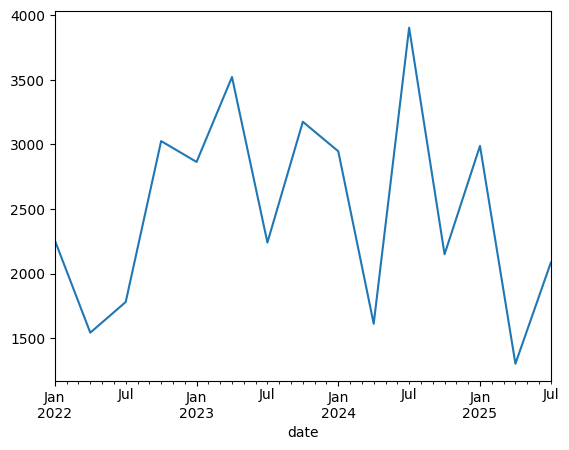

In [36]:
short_airbnb_df['text'].str.len().resample('3M').mean().plot()

/tmp/ipython-input-37-1820397299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')


<Axes: ylabel='date'>

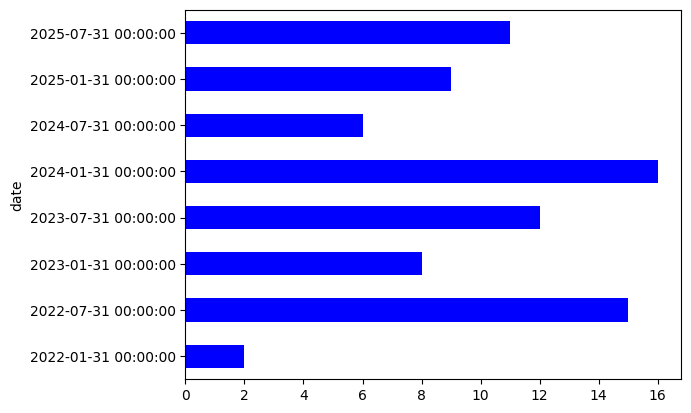

In [37]:
short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')

In [38]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [39]:
#plt.style.use('classic')
plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

/tmp/ipython-input-40-175908563.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
/tmp/ipython-input-40-175908563.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-40-175908563.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-40-175908563.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-40-175908563.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inst

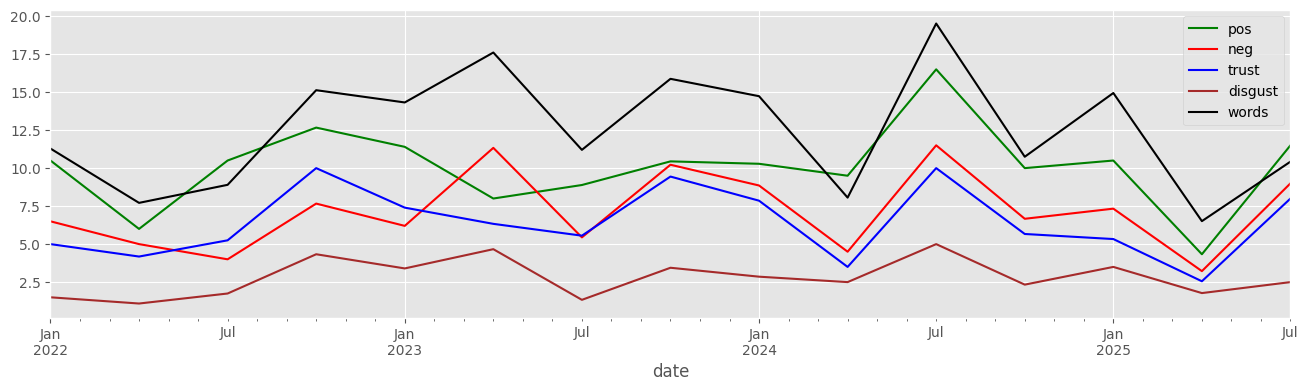

In [40]:
ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_airbnb_df['text'].str.len().resample('3M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [41]:
# daily_df = short_airbnb_df.resample('3M').mean().fillna(0)

/tmp/ipython-input-42-75750340.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))


<Axes: xlabel='date'>

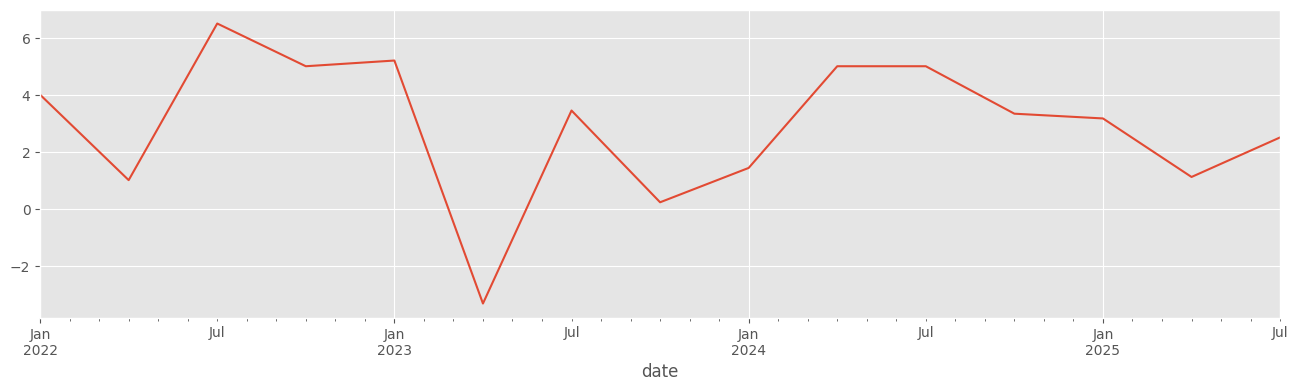

In [42]:
short_airbnb_df['pos/neg'] = short_airbnb_df['positive'] - short_airbnb_df['negative']
short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))

In [43]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-44-2136036587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
/tmp/ipython-input-44-2136036587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0


<Axes: xlabel='date'>

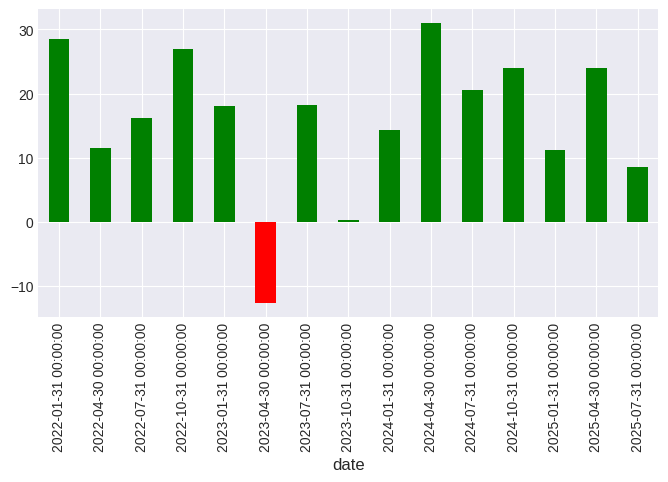

In [44]:
short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_airbnb_df.positive*100//short_airbnb_df[['positive','negative']].sum(
        axis=1) - short_airbnb_df.negative*100//short_airbnb_df[['positive','negative']].sum(axis=1)

short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
                                                                               color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

/tmp/ipython-input-45-2877103554.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col: short_airbnb_df[col].resample('3M').mean()


<Axes: xlabel='date'>

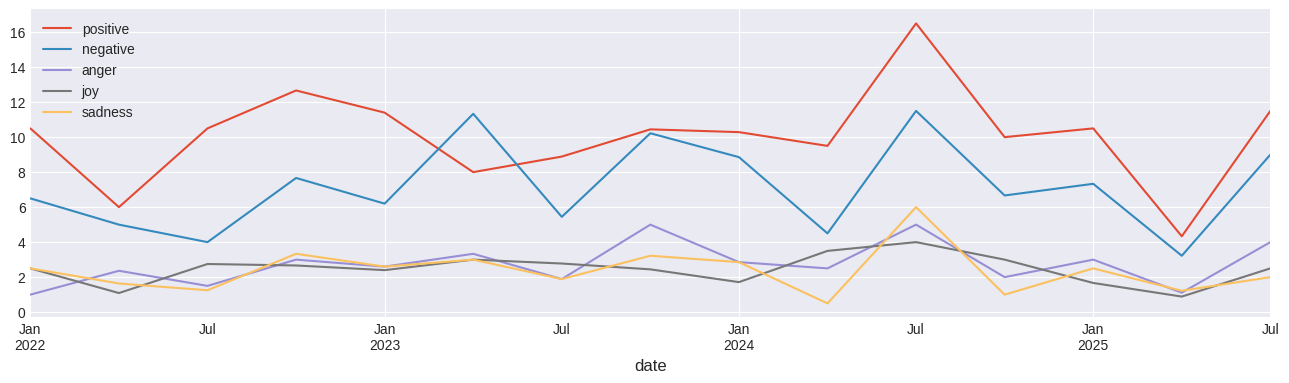

In [45]:
# List of emotion columns
emotion_cols = ['positive', 'negative', 'anger', 'joy', 'sadness']  # add your columns here

# Resample each and combine
resampled = pd.DataFrame({
    col: short_airbnb_df[col].resample('3M').mean()
    for col in emotion_cols
})

# Plot all lines on one figure
resampled.plot(figsize=(16,4), kind='line')

In [46]:
short_airbnb_df[
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
][['positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                           
2023-09-15         0         5                           -100.0
2022-05-16         0         3                           -100.0
2022-02-28         4         0                            100.0
2022-02-28         0         4                           -100.0

In [47]:
text = airbnb_df['text_body'].str.cat(sep = ' ')

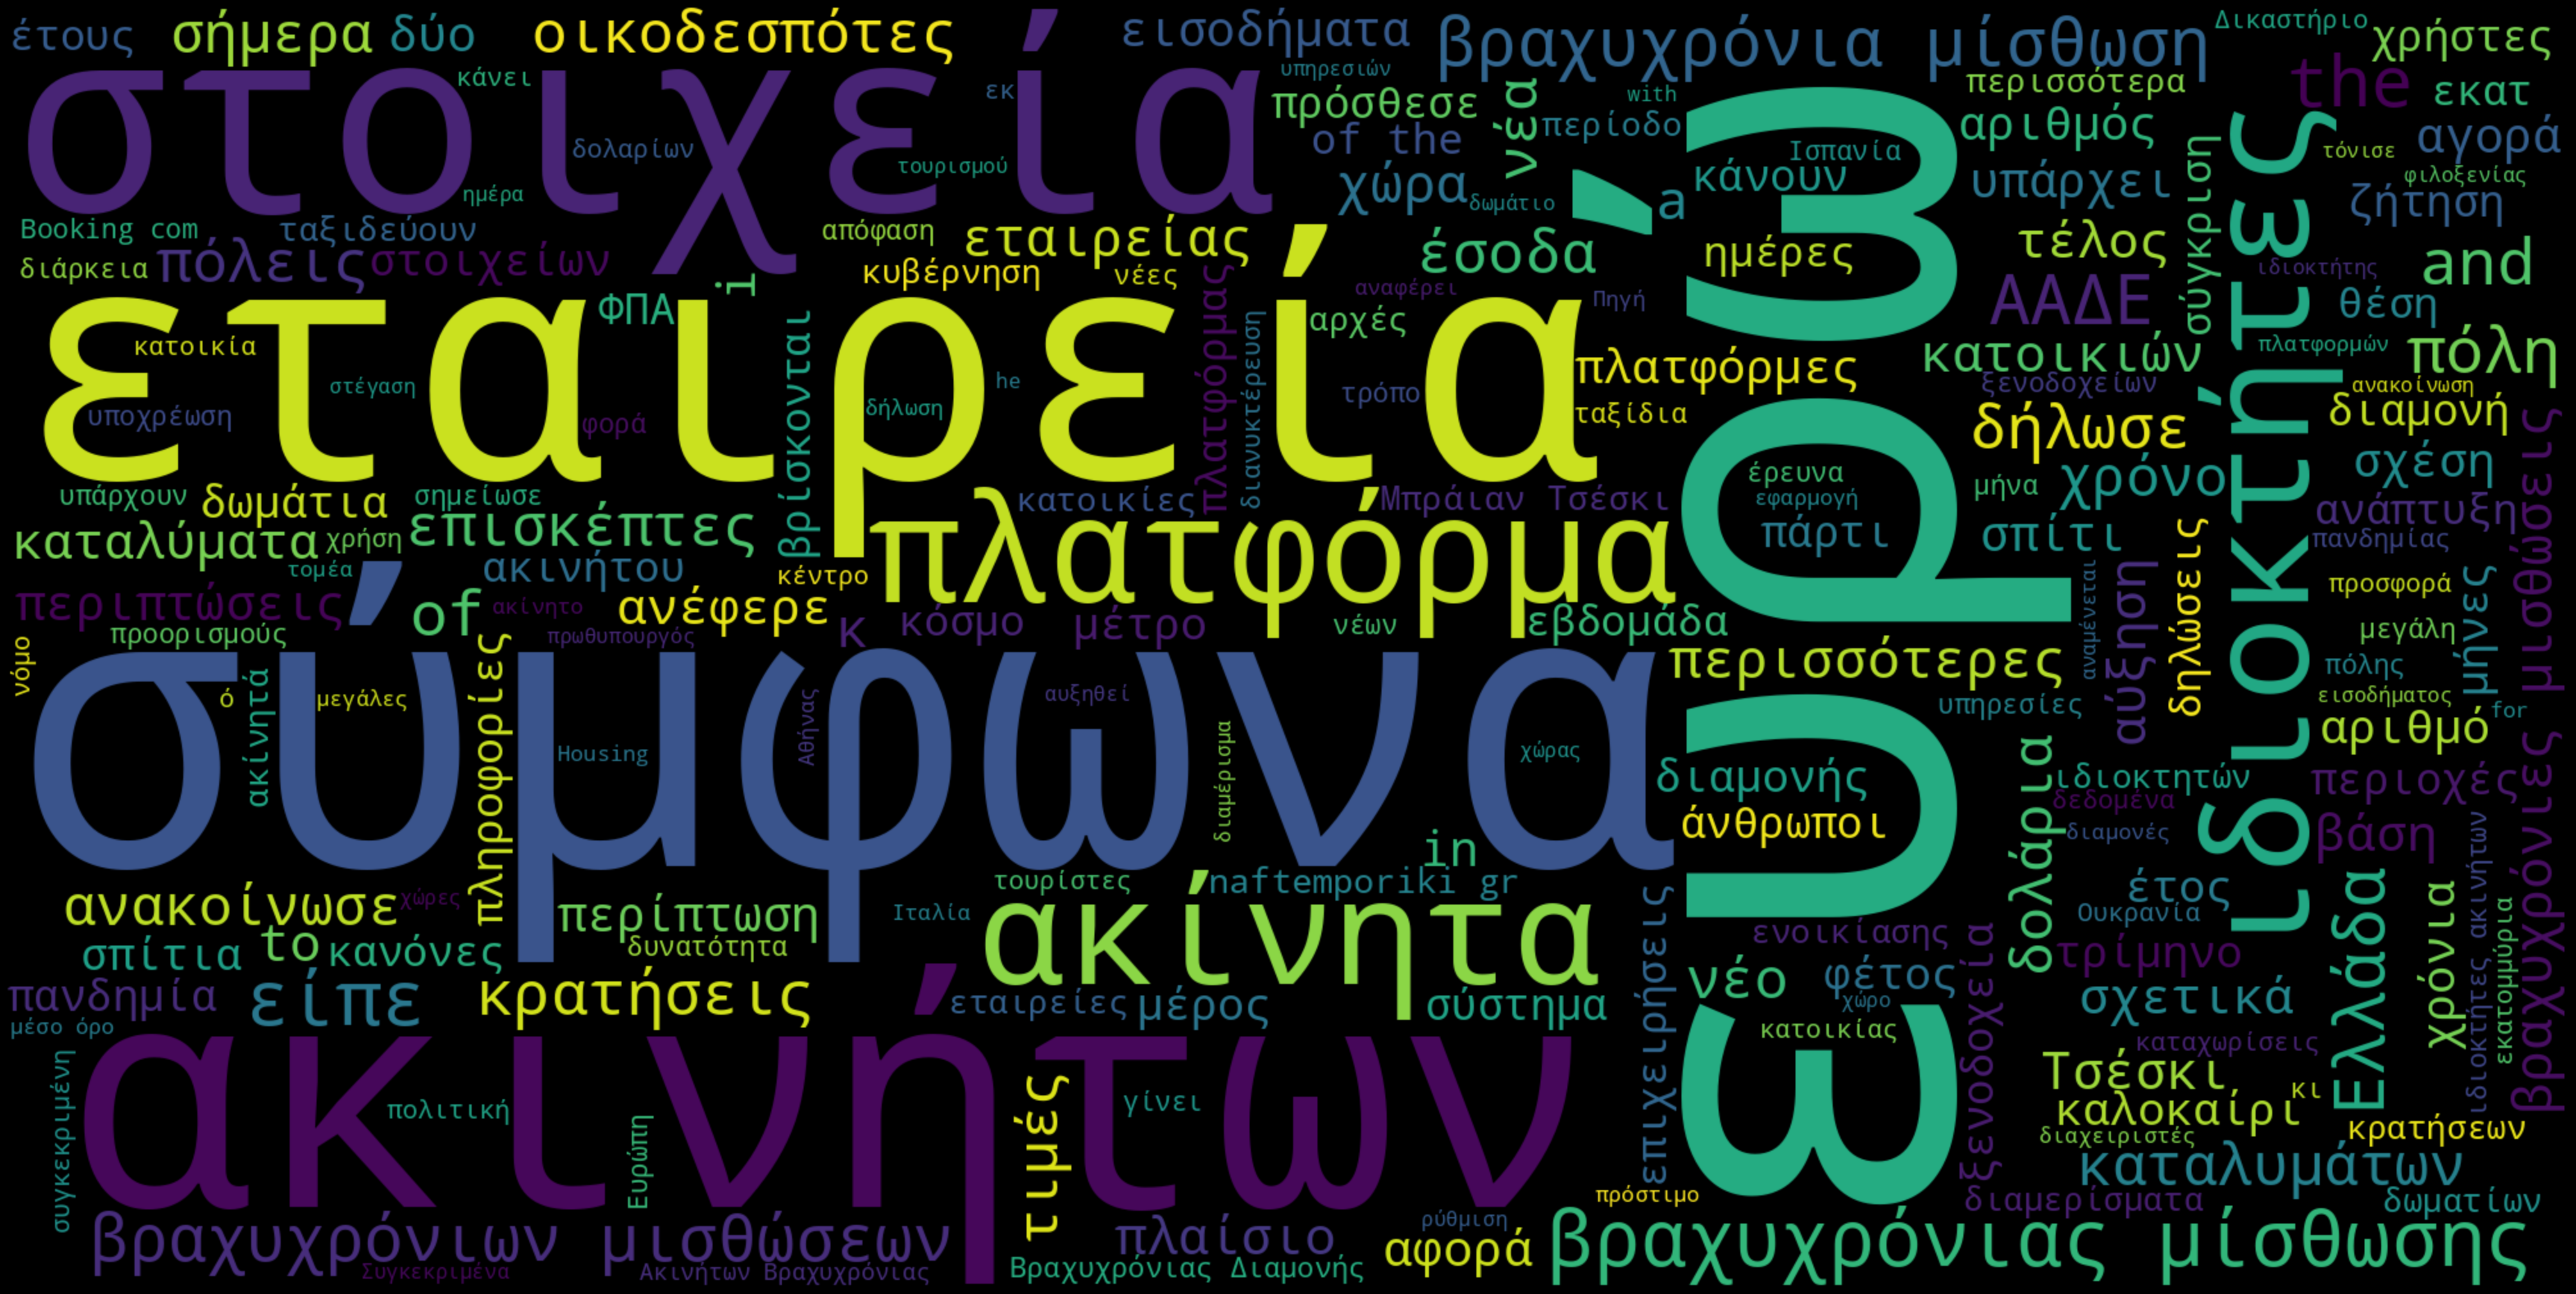

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud1 = WordCloud()
extra_stopwords = {'airbnb', 'ή'}
all_stopwords = nlp.Defaults.stop_words.union(extra_stopwords)

wordcloud1 = WordCloud(
    stopwords=all_stopwords,
    width=2000,
    height=1000,
    background_color='black'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [49]:
mask = short_airbnb_df['text'].str.contains(r'ενοίκια|ενοίκιο', na=False)
print(short_airbnb_df[mask])

                                                         text  anger  \
date                                                                   
2025-05-19  Οι περισσότερες από τις καταχωρίσεις της Airbn...      5   
2024-11-19  «Ο μόνος νικητής από τον πόλεμο της Βαρκελώνης...      1   
2024-09-07  «Ο χαρακτήρας των συνοικιών μας δεν πρέπει να ...      4   
2023-12-01  Ήταν γνωστή ως η πόλη της «Αφροδίτης» του Μποτ...      3   
2023-11-27  Έρευνα του Ελεύθερου Πανεπιστημίου Βρυξελλών, ...      3   
2023-09-19  Ανατροπές στη φορολογία χιλιάδων φυσικών προσώ...      9   
2023-08-03  Έχουν περάσει σχεδόν 15 χρόνια από τότε που η ...     11   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-05-19        18    4        4         4     14             7        3   
2024-11-19        11    3        5         3      7             7        2   
2024-09-07        20    6        6     

In [50]:
filtered_df = short_airbnb_df[mask]
filtered_df

text  anger  \
date                                                                   
2025-05-19  Οι περισσότερες από τις καταχωρίσεις της Airbn...      5   
2024-11-19  «Ο μόνος νικητής από τον πόλεμο της Βαρκελώνης...      1   
2024-09-07  «Ο χαρακτήρας των συνοικιών μας δεν πρέπει να ...      4   
2023-12-01  Ήταν γνωστή ως η πόλη της «Αφροδίτης» του Μποτ...      3   
2023-11-27  Έρευνα του Ελεύθερου Πανεπιστημίου Βρυξελλών, ...      3   
2023-09-19  Ανατροπές στη φορολογία χιλιάδων φυσικών προσώ...      9   
2023-08-03  Έχουν περάσει σχεδόν 15 χρόνια από τότε που η ...     11   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-05-19        18    4        4         4     14             7        3   
2024-11-19        11    3        5         3      7             7        2   
2024-09-07        20    6        6         3      8             5        2   
2023-12-01        10    1        6         1      6             3        3   
2023-11-27        10    3        2         2     11             3        4   
2023-09-19        11    3        2         3      7             3        4   
2023-08-03        10    3        9         7     17            11        8   

            negative  fear  pos/neg  (-)αρνητικότητα | θετικότητα(+)  
date                                                                  
2025-05-19        13     5        5                             17.0  
2024-11-19         6     1        5                             29.0  
2024-09-07        15     5        5                             15.0  
2023-12-01         7     3        3                             17.0  
2023-11-27        10     2        0                              0.0  
2023-09-19        18     1       -7                            -25.0  
2023-08-03        22    12      -12                            -37.0

In [51]:
len(filtered_df)

7

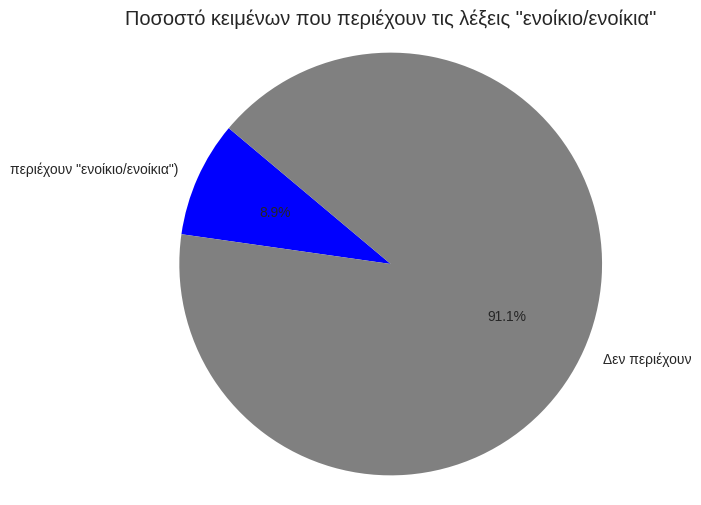

In [52]:
import matplotlib.pyplot as plt

# Δημιουργία μάσκας
mask = short_airbnb_df['text'].str.contains(r'ενοίκια|ενοίκιο', case=False, na=False)

# Υπολογισμός αριθμών
matching = mask.sum()                   # Πόσες γραμμές καλύπτει η μάσκα (True)
not_matching = len(mask) - matching     # Όσες δεν την καλύπτουν

# Δεδομένα για το pie chart
labels = ['περιέχουν "ενοίκιο/ενοίκια")', 'Δεν περιέχουν']
sizes = [matching, not_matching]
colors = ['blue', 'gray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ποσοστό κειμένων που περιέχουν τις λέξεις "ενοίκιο/ενοίκια"')
plt.axis('equal')  # κάνει τον κύκλο "στρογγυλό"
plt.show()